Here we will demonstrate why our model isn't the best choice for forecasting when there are simple features and a predictable seasonal sales pattern. The ML model's confidence scores are inversely related to business reality. Linear Regression provides mathematically sound volume forecasts. This chart demonstrates why LR is the more effective methodology for inventory planning.

🎯 Chart 4: ML Probability vs Forecasted Volume (Methodology Comparison)
🚨 METHODOLOGY COMPARISON RESULTS:
   (Showing #1 recommended model each month)
   January   : Oldsmobile-Silhouette | 16 units | 100.0% confidence | ✓ Reasonable
   February  : Mitsubishi-Diamante  | 14 units | 100.0% confidence | 🚨 MISMATCH
   March     : Mitsubishi-Diamante  | 28 units | 100.0% confidence | ✓ Reasonable
   April     : Chevrolet-Prizm      | 29 units | 99.9% confidence | ✓ Reasonable
   May       : Chrysler-LHS         | 33 units | 99.9% confidence | ✓ Reasonable
   June      : Volkswagen-Passat    | 36 units | 100.0% confidence | ✓ Reasonable
   July      : Chevrolet-Prizm      | 33 units | 99.9% confidence | ✓ Reasonable
   August    : Dodge-Ram Pickup     | 38 units | 99.7% confidence | ✓ Reasonable
   September : Volkswagen-Jetta     | 75 units |  0.2% confidence | 🚨 MISMATCH
   October   : Volkswagen-Passat    | 36 units | 99.9% confidence | ✓ Reasonable
   November  : Volkswagen-Jetta     | 

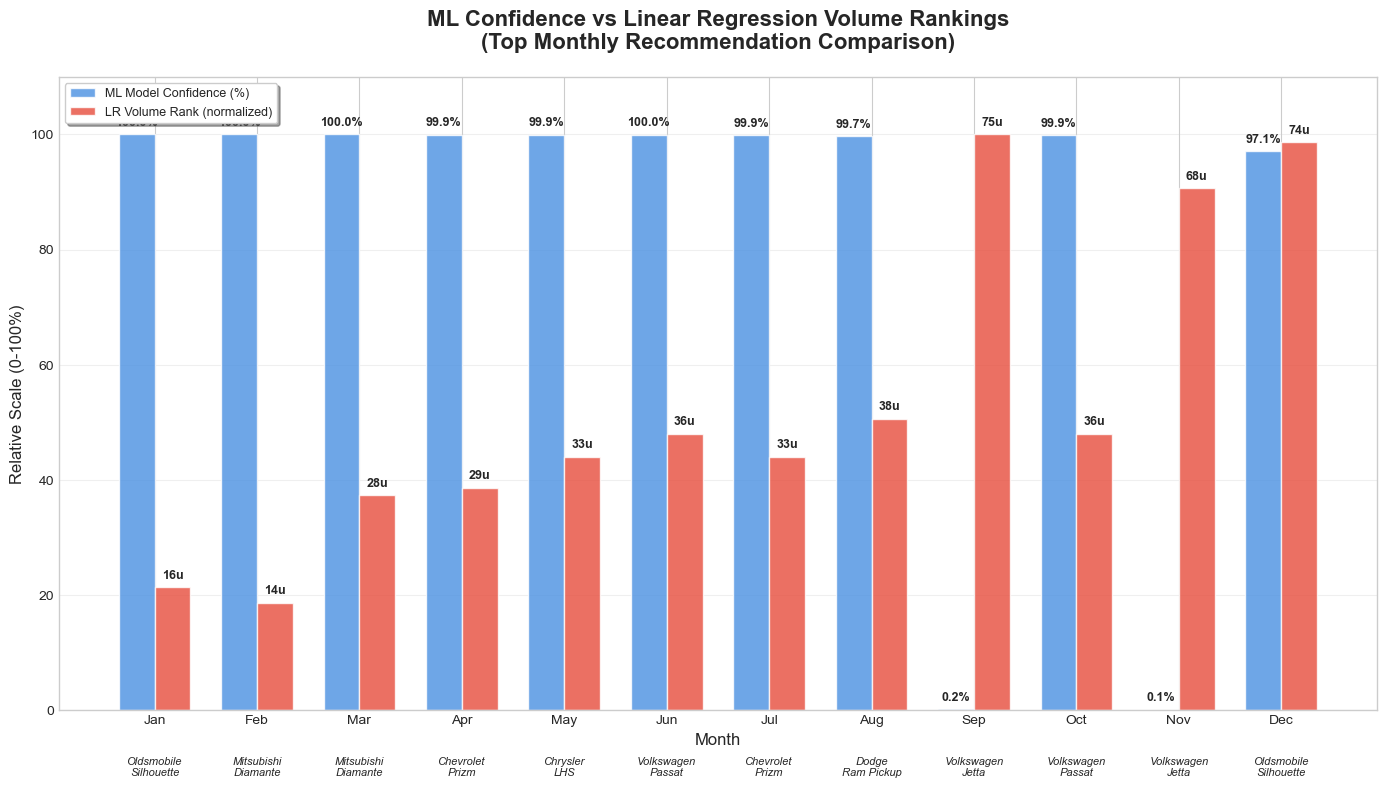

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Load the combined forecast data
combined_df = pd.read_csv('../output/combined_forecast_2024.csv')

print("🎯 Chart 4: ML Probability vs Forecasted Volume (Methodology Comparison)")
print("=" * 70)

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Get the #1 recommended model for each month (highest volume from LR)
top_monthly = combined_df[combined_df['rank'] == 1].copy()

# Create the figure
plt.figure(figsize=(14, 8))

# Prepare data
months = top_monthly['month'].values
ml_probs = top_monthly['ml_probability'].values * 100  # Convert to percentage
lr_volumes = top_monthly['forecast_volume'].values

# Normalize LR volumes to 0-100 scale for comparison
lr_volumes_normalized = (lr_volumes / lr_volumes.max()) * 100

# Create side-by-side bars
x = np.arange(len(months))
width = 0.35

# ML Probability bars (blue)
bars1 = plt.bar(x - width/2, ml_probs, width, label='ML Model Confidence (%)', 
                color='#4A90E2', alpha=0.8, edgecolor='white', linewidth=1)

# LR Volume bars (coral) - normalized to same scale
bars2 = plt.bar(x + width/2, lr_volumes_normalized, width, label='LR Volume Rank (normalized)', 
                color='#E74C3C', alpha=0.8, edgecolor='white', linewidth=1)

plt.title('ML Confidence vs Linear Regression Volume Rankings\n(Top Monthly Recommendation Comparison)', 
          fontweight='bold', pad=20, fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Relative Scale (0-100%)', fontsize=12)

# Customize x-axis
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add value labels on bars
for i, (bar1, bar2, prob, vol) in enumerate(zip(bars1, bars2, ml_probs, lr_volumes)):
    # ML probability labels
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 1,
             f'{prob:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # LR volume labels (show actual volume, not normalized)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 1,
             f'{vol}u', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Add model names below each month
for i, (month, model) in enumerate(zip(months, top_monthly['brand_model'])):
    plt.text(i, -8, model.replace('-', '\n'), ha='center', va='top', 
             fontsize=8, rotation=0, style='italic')

plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 110)  # Give space for labels
plt.tight_layout()

# Print the problematic examples
print("🚨 METHODOLOGY COMPARISON RESULTS:")
print("   (Showing #1 recommended model each month)")
print("=" * 50)

problem_months = []
for _, row in top_monthly.iterrows():
    month_name = pd.Timestamp(2024, row['month'], 1).strftime('%B')
    model = row['brand_model']
    volume = row['forecast_volume']
    ml_conf = row['ml_probability']
    
    # Flag problematic cases
    is_problem = (volume > 30 and ml_conf < 0.5) or (volume < 15 and ml_conf > 0.95)
    
    status = "🚨 MISMATCH" if is_problem else "✓ Reasonable"
    if is_problem:
        problem_months.append(month_name)
    
    print(f"   {month_name:10}: {model:20} | {volume:2} units | {ml_conf:5.1%} confidence | {status}")
print("\n📊 SUMMARY:")
print(f"   • {len(problem_months)} out of 12 months show severe ML/LR misalignment")
print(f"   • Problem months: {', '.join(problem_months)}")

# Calculate overall mismatch
high_vol_low_conf = len(top_monthly[(top_monthly['forecast_volume'] > 30) & 
                                   (top_monthly['ml_probability'] < 0.5)])
low_vol_high_conf = len(top_monthly[(top_monthly['forecast_volume'] < 15) & 
                                   (top_monthly['ml_probability'] > 0.95)])

print(f"   • High Volume + Low Confidence: {high_vol_low_conf} months")
print(f"   • Low Volume + High Confidence: {low_vol_high_conf} months")

plt.show()
